In [26]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
import datetime
import ssl
import joblib

In [2]:
Start = input('Enter Start year (2011-20xx): ')
End = input('Enter End year (2011-20xx): ')

Enter Start year (2011-20xx): 2011
Enter End year (2011-20xx): 2021


In [3]:
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

current_year = datetime.datetime.now().year
base = 'https://www.americashealthrankings.org/api/v1/downloads/'
start = input('Enter Start year (2011-20xx): ')
end = input('Enter End year (2011-20xx): ')
frames = []
for year in range(int(start), int(end)+1):
    # Data before and after 2015 is on different end points hence adding a check
    if year >= 2015:
        # Getting report Id from page
        res = requests.get(f'https://www.americashealthrankings.org/explore/annual/measure/Suicide/state/ALL?edition-year={year}')
    # Faced issues when scraping page for different years, figured out a way to get report ID
        source_id = res.text.split(f'"Name":"{year} Annual","EditionId":')[1][:4]
        # Checking if edition ID is 2,3 or 4 digits
        if source_id.isdecimal():
            df = pd.read_csv(base + source_id)
        elif source_id[:3].isdecimal():
            df = pd.read_csv(base + source_id[:3])
        else:
            df = pd.read_csv(base + source_id[:2])
    else:
        df = pd.read_csv(base + f'report/1/{year}')
    
    # Filtering only suicide data
    df['Measure Name'] = df['Measure Name'].fillna('Blank')
    df_2 = df[df['Measure Name'].str.contains('Suicide')]
    # Adding to dataframes list
    frames.append(df_2)

Enter Start year (2011-20xx): 2011
Enter End year (2011-20xx): 2021


In [4]:
# Merging all yearly data into a single dataframe    
df = pd.concat(frames)
# selecting necessary columns only
df = df[['Edition', 'Measure Name', 'Value', 'State Name']]
df.head()

,Edition,Measure Name,Value,State Name
11856,2011,Suicide,14.1,Alabama
11857,2011,Suicide,20.4,Alaska
11858,2011,Suicide,17.1,Arizona
11859,2011,Suicide,14.7,Arkansas
11860,2011,Suicide,10.7,California


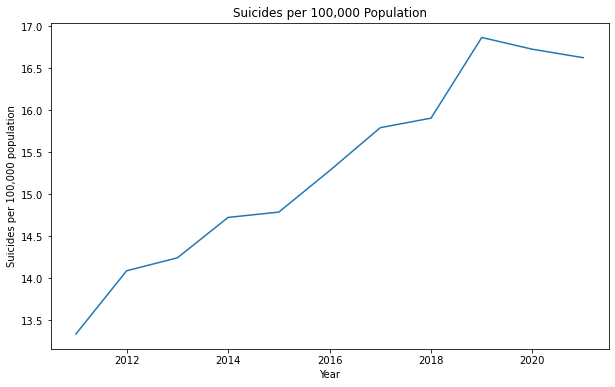

In [183]:
"""Date for each parameter is contained in a single CSV file as separate rows, below we will extract data for each parameter in a separate dataframe and plot it"""
# Extracting aggregated suicide data
df_total = df[df['Measure Name'] == 'Suicide']
# Grouping by year and ploting average suicide rate
total_data = df_total.groupby('Edition')['Value'].mean()
total_data.plot(figsize=(10,6), xlabel= 'Year', title = 'Suicides per 100,000 Population', ylabel = 'Suicides per 100,000 population')
plt.show()

In [6]:
total_data

Edition
2011    13.338462
2012    14.090385
2013    14.244231
2014    14.725000
2015    14.788462
2016    15.280769
2017    15.792308
2018    15.905769
2019    16.865385
2020    16.725000
2021    16.625000
Name: Value, dtype: float64

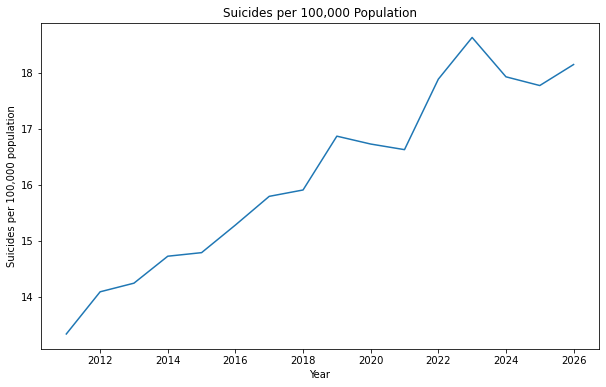

In [52]:
final_total_data.plot(figsize=(10,6), xlabel= 'Year', title = 'Suicides per 100,000 Population', ylabel = 'Suicides per 100,000 population')
plt.savefig('./Output_Images/Suicides per 100,000 population.png')
plt.show()

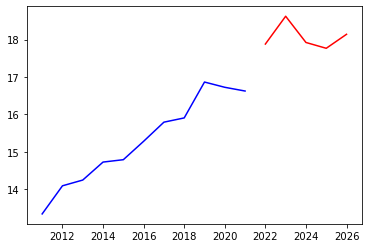

In [53]:
plt.plot(total_data, color='blue')
plt.plot(forecasted_values, color='red')

In [7]:
type(total_data)

pandas.core.series.Series

In [27]:
#import tensorflow as ft
#from tensorflow import keras

In [28]:
#model = keras.models.load_model("Suicides_per_100K.h5")

In [29]:
# load, no need to initialize the loaded model
loaded_model = joblib.load('./models/Suicides_per_100K.joblib')

In [32]:
End = 2026
seasons = End-2021 #Number of years to be forecasted
forecasted = loaded_model.forecast(seasons)
forecasted

2022-01-18    17.881275
2022-01-19    18.625178
2022-01-20    17.923656
2022-01-21    17.768084
2022-01-22    18.142694
Freq: D, Name: predicted_mean, dtype: float64

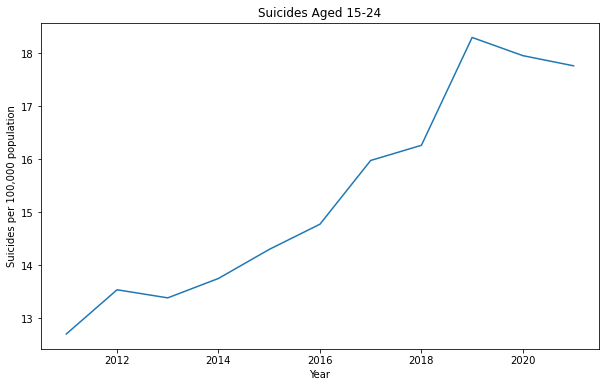

In [10]:
# Extracting suicide data for ages 15-24
df_total = df[df['Measure Name'] == 'Suicide - Ages 15-24']
total_data = df_total.groupby('Edition')['Value'].mean()
total_data.plot(figsize=(10,6), xlabel= 'Year', title = 'Suicides Aged 15-24', ylabel = 'Suicides per 100,000 population')
plt.show()

In [11]:
total_data

Edition
2011    12.706522
2012    13.539583
2013    13.386957
2014    13.753191
2015    14.300000
2016    14.775000
2017    15.976087
2018    16.261702
2019    18.293750
2020    17.951020
2021    17.759574
Name: Value, dtype: float64

In [46]:
forecasted

2022-01-18    17.881275
2022-01-19    18.625178
2022-01-20    17.923656
2022-01-21    17.768084
2022-01-22    18.142694
Freq: D, Name: predicted_mean, dtype: float64

In [42]:
indices = [*range(2022, 2022+seasons)]
indices

[2022, 2023, 2024, 2025, 2026]

In [48]:
forecasted_values = forecasted.set_axis(indices)
forecasted_values

2022    17.881275
2023    18.625178
2024    17.923656
2025    17.768084
2026    18.142694
Name: predicted_mean, dtype: float64

In [51]:
final_total_data = total_data.append(forecasted_values)
final_total_data

2011    13.338462
2012    14.090385
2013    14.244231
2014    14.725000
2015    14.788462
2016    15.280769
2017    15.792308
2018    15.905769
2019    16.865385
2020    16.725000
2021    16.625000
2022    17.881275
2023    18.625178
2024    17.923656
2025    17.768084
2026    18.142694
dtype: float64

16.625

In [123]:
df_gender 

,Edition,Measure Name,Value,State Name
12480,2011,Suicide - Female,5.3,Alabama
12481,2011,Suicide - Female,9.7,Alaska
12482,2011,Suicide - Female,8.5,Arizona
12483,2011,Suicide - Female,5.8,Arkansas
12484,2011,Suicide - Female,5.0,California
...,...,...,...,...
48046,2021,Suicide - Male,29.0,West Virginia
48047,2021,Suicide - Male,23.1,Wisconsin
48048,2021,Suicide - Male,51.3,Wyoming
48049,2021,Suicide - Male,23.4,United States


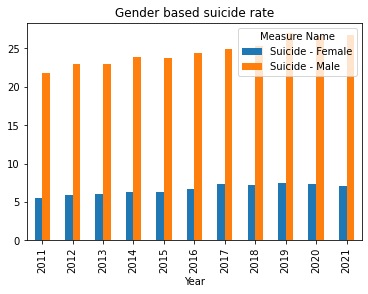

In [12]:
# Extracting gender based Suicide data
df_gender = df[(df['Measure Name'] == 'Suicide - Female') | (df['Measure Name'] == 'Suicide - Male')]
gender_group = df_gender.groupby(['Edition', 'Measure Name'])['Value'].mean()
#gender_group.plot(kind = 'bar')
gender_group.to_frame().reset_index().pivot(index='Edition', columns='Measure Name', values='Value').plot(kind='bar', xlabel= 'Year', title = 'Gender based suicide rate')
plt.show()

In [96]:
loaded_model_male = joblib.load('./models/Suicides_gender_male.joblib')  # Loading the model
loaded_model_female = joblib.load('./models/Suicides_gender_female.joblib')
forecasted_male = loaded_model_male.forecast(5)  # Forecasting the given years
forecasted_female = loaded_model_female.forecast(5)
indices = [*range(2022, 2022 + seasons)]  # Indices used for forecasted data
forecasted_values_male = forecasted_male.set_axis(indices)  # Using the right indices for forecasted
forecasted_values_female = forecasted_female.set_axis(indices)

In [97]:
dfx = gender_group.to_frame().reset_index().pivot(index='Edition', columns='Measure Name', values='Value')
dfx.head() # This is the dataframe for the already existing values

Measure Name,Suicide - Female,Suicide - Male
Edition,,
2011,5.530612,21.815385
2012,5.870833,23.026923
2013,6.066667,22.996154
2014,6.287755,23.873077
2015,6.354000,23.807692


In [106]:
list_male = list(forecasted_values_male.values)
list_female = list(forecasted_values_female.values)

In [113]:
existing_list_male = list(dfx['Suicide - Male'].values)
existing_list_female = list(dfx['Suicide - Female'].values)

In [119]:
final_list_male = existing_list_male+list_male
final_list_female = existing_list_female+list_female
new_idx = [*range(Start,End+1)]

In [180]:
new_df = pd.DataFrame()
new_df['Index'] = new_idx 
new_df['Suicide - Male'] = final_list_male
new_df['Suicide - Female'] = final_list_female
#new_df.pivot(index='Edition', columns='Measure Name')
#new_df = new_df.set_index('index')

In [181]:
new_df

,Index,Suicide - Male,Suicide - Female
0,2011,5.846429,6.345000
1,2012,5.870000,6.519048
2,2013,6.303704,6.147826
3,2014,6.609677,6.641667
4,2015,6.066667,6.715000
5,2016,6.161290,7.453571
6,2017,6.377419,7.062963
7,2018,7.056250,7.803448
8,2019,7.579412,7.851724
9,2020,8.036364,8.330000


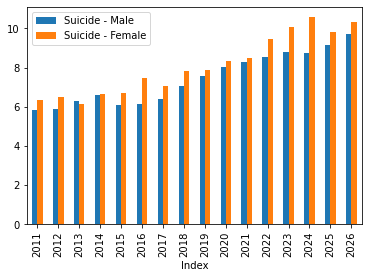

In [182]:
# plotting graph
new_df.plot(x="Index", y=["Suicide - Male", "Suicide - Female"], kind="bar")
plt.savefig('./Output_Images/Gender based suicide rate.png')

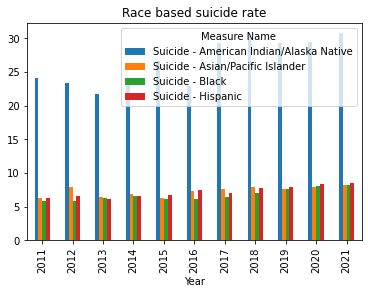

In [141]:
# Extracting racial suicide data
df_race = df[(df['Measure Name'] == 'Suicide - American Indian/Alaska Native') | (df['Measure Name'] == 'Suicide - Asian/Pacific Islander') | (df['Measure Name'] == 'Suicide - Black') | (df['Measure Name'] == 'Suicide - Hispanic')]
race_group = df_race.groupby(['Edition', 'Measure Name'])['Value'].mean()
#race_group.to_frame().reset_index().pivot(index='Edition', columns='Measure Name', values='Value').plot(kind='bar', xlabel= 'Year', title = 'Race based suicide rate')
#plt.show()

In [132]:
loaded_model_AmericanIndianAlaska_Native = joblib.load('./models/Suicides_race_American Indian_Alaska Native.joblib')  # Loading the model
loaded_model_AsianPacific_Islander = joblib.load('./models/Suicides_race_Asian_Pacific Islander.joblib')
loaded_model_Black = joblib.load('./models/Suicides_race_black.joblib')
loaded_model_Hispanic = joblib.load('./models/Suicides_race_Hispanic.joblib')

forecasted_AmericanIndianAlaska_Native = loaded_model_AmericanIndianAlaska_Native.forecast(5)  # Forecasting the given years
forecasted_AsianPacific_Islander = loaded_model_AsianPacific_Islander.forecast(5)
forecasted_Black = loaded_model_Black.forecast(5)  # Forecasting the given years
forecasted_Hispanic = loaded_model_Hispanic.forecast(5)

indices = [*range(2022, 2022 + seasons)]  # Indices used for forecasted data
forecasted_values_AmericanIndianAlaska_Native = forecasted_AmericanIndianAlaska_Native.set_axis(indices)  # Using the right indices for forecasted
forecasted_values_AsianPacific_Islander = forecasted_AsianPacific_Islander.set_axis(indices)
forecasted_values_Black = forecasted_Black.set_axis(indices)
forecasted_values_Hispanic = forecasted_Hispanic.set_axis(indices)

In [134]:
dfx = race_group.to_frame().reset_index().pivot(index='Edition', columns='Measure Name', values='Value')
dfx.head() # This is the dataframe for the already existing values

Measure Name,Suicide - American Indian/Alaska Native,Suicide - Asian/Pacific Islander,Suicide - Black,Suicide - Hispanic
Edition,,,,
2011,24.087500,6.309091,5.846429,6.345000
2012,23.322222,7.846667,5.870000,6.519048
2013,21.712500,6.406667,6.303704,6.147826
2014,23.637500,6.912500,6.609677,6.641667
2015,26.620000,6.213333,6.066667,6.715000


In [135]:
#Making a list for the forecasted values
list_AmericanIndianAlaska_Native = list(forecasted_values_AmericanIndianAlaska_Native.values)
list_AsianPacific_Islander = list(forecasted_values_AsianPacific_Islander.values)
list_Black = list(forecasted_values_Black.values)
list_Hispanic = list(forecasted_values_Hispanic.values)

In [136]:
#Making a list for the already existing values
existing_list_AmericanIndianAlaska_Native = list(dfx['Suicide - American Indian/Alaska Native'].values)
existing_list_AsianPacific_Islander = list(dfx['Suicide - Asian/Pacific Islander'].values)
existing_list_Black = list(dfx['Suicide - Black'].values)
existing_list_Hispanic = list(dfx['Suicide - Hispanic'].values)

In [138]:
#Making a list containing both existing and predicted values
final_list_AmericanIndianAlaska_Native = existing_list_AmericanIndianAlaska_Native+list_AmericanIndianAlaska_Native
final_list_AsianPacific_Islander = existing_list_AsianPacific_Islander+list_AsianPacific_Islander
final_list_Black = existing_list_Black+list_Black
final_list_Hispanic = existing_list_Hispanic+list_Hispanic

new_idx = [*range(Start,End+1)]

In [139]:
new_df = pd.DataFrame()
new_df['Index'] = new_idx 
new_df['Suicide - American Indian/Alaska Native'] = final_list_AmericanIndianAlaska_Native
new_df['Suicide - Asian/Pacific Islander'] = final_list_AsianPacific_Islander
new_df['Suicide - Black'] = final_list_Black
new_df['Suicide - Hispanic'] = final_list_Hispanic

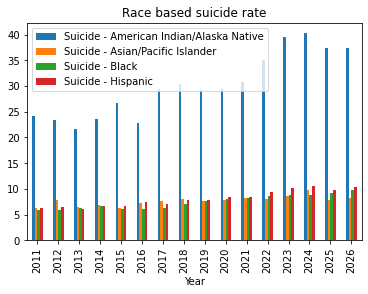

In [178]:
# plotting graph
new_df.plot(x="Index", y=['Suicide - American Indian/Alaska Native', "Suicide - Asian/Pacific Islander",
                         'Suicide - Black','Suicide - Hispanic'], kind="bar",
            xlabel='Year',
            title='Race based suicide rate')
plt.savefig('./Output_Images/Race based suicide rate.png')

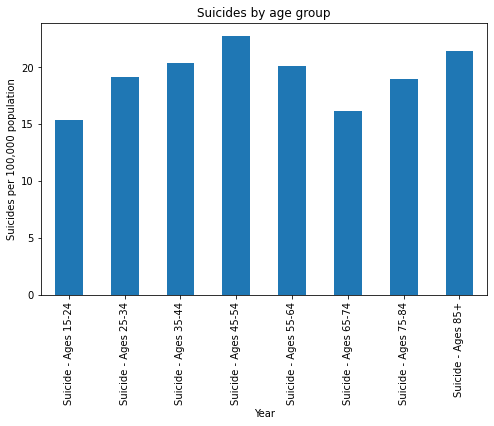

In [143]:
# Extracting Age based suicide data
df_age = df[(df['Measure Name'] == 'Suicide - Ages 15-24') | (df['Measure Name'] == 'Suicide - Ages 25-34') | (df['Measure Name'] == 'Suicide - Ages 35-44') | (df['Measure Name'] == 'Suicide - Ages 45-54') | (df['Measure Name'] == 'Suicide - Ages 55-64') | (df['Measure Name'] == 'Suicide - Ages 65-74') | (df['Measure Name'] == 'Suicide - Ages 75-84') | (df['Measure Name'] == 'Suicide - Ages 85+')]
age_group = df_age.groupby(['Measure Name'])['Value'].mean()
age_group.plot(kind ='bar', figsize=(8,5), xlabel= 'Year', title = 'Suicides by age group', ylabel = 'Suicides per 100,000 population')
plt.show()

In [150]:
age_group

Measure Name
Suicide - Ages 15-24    15.355491
Suicide - Ages 25-34    19.117202
Suicide - Ages 35-44    20.395104
Suicide - Ages 45-54    22.768535
Suicide - Ages 55-64    20.153484
Suicide - Ages 65-74    16.155432
Suicide - Ages 75-84    18.978173
Suicide - Ages 85+      21.461321
Name: Value, dtype: float64

In [167]:
#Obtaining the mean values for existing data
Existing_15_24 = age_group.iloc[0]
Existing_25_34 = age_group.iloc[1]
Existing_35_44 = age_group.iloc[2]
Existing_45_54 = age_group.iloc[3]
Existing_55_64 = age_group.iloc[4]
Existing_65_64 = age_group.iloc[5]
Existing_75_84 = age_group.iloc[6]
Existing_85_plus = age_group.iloc[7]

In [154]:
#Loading models for predicting each age set
model_15_24 = joblib.load('./models/Suicides_age_groupSuicide - Ages 15-24.joblib')
model_25_34 = joblib.load('./models/Suicides_age_groupSuicide - Ages 25-34.joblib')
model_35_44 = joblib.load('./models/Suicides_age_groupSuicide - Ages 35-44.joblib')
model_45_54 = joblib.load('./models/Suicides_age_groupSuicide - Ages 45-54.joblib')
model_55_64 = joblib.load('./models/Suicides_age_groupSuicide - Ages 55-64.joblib')
model_65_74 = joblib.load('./models/Suicides_age_groupSuicide - Ages 65-74.joblib')
model_75_84 = joblib.load('./models/Suicides_age_groupSuicide - Ages 75-84.joblib')
model_85_plus = joblib.load('./models/Suicides_age_groupSuicide - Ages 85+.joblib')

In [168]:
#Getting the predicted values for each age set
predicted_15_24 = model_15_24.forecast(5)
predicted_25_34 = model_25_34.forecast(5)
predicted_35_44 = model_35_44.forecast(5)
predicted_45_54 = model_45_54.forecast(5)
predicted_55_64 = model_55_64.forecast(5)
predicted_65_64 = model_65_74.forecast(5)
predicted_75_84 = model_75_84.forecast(5)
predicted_85_plus = model_85_plus.forecast(5)

In [169]:
# Getting the average between initial and predicted values
Final_15_24 = (predicted_15_24.mean()+Existing_15_24)/2
Final_25_34 = (predicted_25_34.mean()+Existing_25_34)/2
Final_35_44 = (predicted_35_44.mean()+Existing_35_44)/2
Final_45_54 = (predicted_45_54.mean()+Existing_45_54)/2
Final_55_64 = (predicted_55_64.mean()+Existing_55_64)/2
Final_65_64 = (predicted_65_64.mean()+Existing_65_64)/2
Final_75_84 = (predicted_75_84.mean()+Existing_75_84)/2
Final_85_plus = (predicted_85_plus.mean()+Existing_85_plus)/2

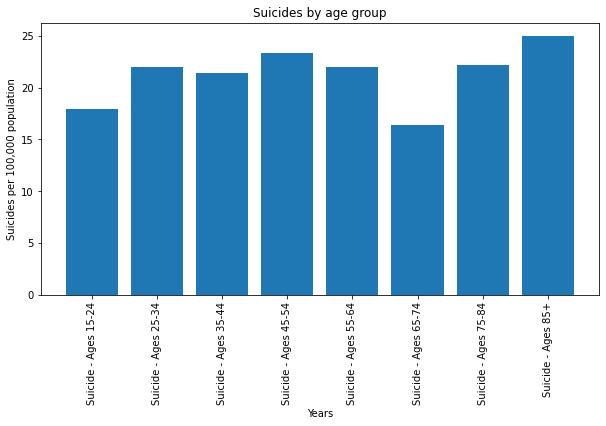

In [177]:
#Plotting
values = [Final_15_24,Final_25_34,Final_35_44,Final_45_54,Final_55_64,Final_65_64,Final_75_84,Final_85_plus]
labels = ['Suicide - Ages 15-24','Suicide - Ages 25-34','Suicide - Ages 35-44','Suicide - Ages 45-54',
                 'Suicide - Ages 55-64','Suicide - Ages 65-74','Suicide - Ages 75-84','Suicide - Ages 85+']
fig = plt.figure(figsize = (10, 5))
 
y_pos = range(len(labels))
plt.bar(y_pos, values)
plt.xticks(y_pos, labels, rotation=90)
 
plt.xlabel("Years")
plt.ylabel("Suicides per 100,000 population")
plt.title("Suicides by age group")
plt.savefig('./Output_Images/Suicides by age group.png')
plt.show()

In [185]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
import datetime
import ssl
import joblib

Start = int(input('Enter Start year (2011-20xx): '))
End = int(input('Enter End year (2011-20xx): '))
if End <= 2021:  # We only have data for up to 2021
    try:
        _create_unverified_https_context = ssl._create_unverified_context
    except AttributeError:
        pass
    else:
        ssl._create_default_https_context = _create_unverified_https_context
    current_year = datetime.datetime.now().year
    base = 'https://www.americashealthrankings.org/api/v1/downloads/'
    start = Start  # input('Enter Start year (2011-20xx): ')
    end = End  # input('Enter End year (2011-20xx): ')
    frames = []
    for year in range(int(start), int(end) + 1):
        # Data before and after 2015 is on different end points hence adding a check
        if year >= 2015:
            # Getting report Id from page
            res = requests.get(
                f'https://www.americashealthrankings.org/explore/annual/measure/Suicide/state/ALL?edition-year={year}')
            # Faced issues when scraping page for different years, figured out a way to get report ID
            source_id = res.text.split(f'"Name":"{year} Annual","EditionId":')[1][:4]
            # Checking if edition ID is 2,3 or 4 digits
            if source_id.isdecimal():
                df = pd.read_csv(base + source_id)
            elif source_id[:3].isdecimal():
                df = pd.read_csv(base + source_id[:3])
            else:
                df = pd.read_csv(base + source_id[:2])
        else:
            df = pd.read_csv(base + f'report/1/{year}')
        # Filtering only suicide data
        df['Measure Name'] = df['Measure Name'].fillna('Blank')
        df_2 = df[df['Measure Name'].str.contains('Suicide')]
        # Adding to dataframes list
        frames.append(df_2)
    # Merging all yearly data into a single dataframe
    df = pd.concat(frames)
    # selecting necessary columns only
    df = df[['Edition', 'Measure Name', 'Value', 'State Name']]

    """Date for each parameter is contained in a single CSV file as separate rows, below we will extract data for each parameter in a separate dataframe and plot it"""
    # Extracting aggregated suicide data
    df_total = df[df['Measure Name'] == 'Suicide']
    # Grouping by year and ploting average suicide rate
    total_data = df_total.groupby('Edition')['Value'].mean()
    total_data.plot(figsize=(10, 6), xlabel='Year', title='Suicides per 100,000 Population',
                    ylabel='Suicides per 100,000 population')
    plt.savefig('./Output_Images/Suicides per 100,000 population.png')
    plt.show()
    # Extracting suicide data for ages 15-24
    df_total = df[df['Measure Name'] == 'Suicide - Ages 15-24']
    total_data = df_total.groupby('Edition')['Value'].mean()
    total_data.plot(figsize=(10, 6), xlabel='Year', title='Suicides Aged 15-24',
                    ylabel='Suicides per 100,000 population')
    plt.savefig('./Output_Images/Suicides aged 15-24.png')
    plt.show()

    # Extracting gender based Suicide data
    df_gender = df[(df['Measure Name'] == 'Suicide - Female') | (df['Measure Name'] == 'Suicide - Male')]
    gender_group = df_gender.groupby(['Edition', 'Measure Name'])['Value'].mean()
    # gender_group.plot(kind = 'bar')
    gender_group.to_frame().reset_index().pivot(index='Edition', columns='Measure Name', values='Value').plot(
        kind='bar',
        xlabel='Year',
        title='Gender based suicide rate')
    plt.savefig('./Output_Images/Suicides by gender.png')
    plt.show()

    # Extracting racial suicide data
    df_race = df[(df['Measure Name'] == 'Suicide - American Indian/Alaska Native') | (
            df['Measure Name'] == 'Suicide - Asian/Pacific Islander') | (df['Measure Name'] == 'Suicide - Black') | (
                         df['Measure Name'] == 'Suicide - Hispanic')]
    race_group = df_race.groupby(['Edition', 'Measure Name'])['Value'].mean()
    race_group.to_frame().reset_index().pivot(index='Edition', columns='Measure Name', values='Value').plot(kind='bar',
                                                                                                            xlabel='Year',
                                                                                                            title='Race based suicide rate')
    plt.savefig('./Output_Images/Suicides by race.png')
    plt.show()

    # Extracting Age based suicide data
    df_age = df[(df['Measure Name'] == 'Suicide - Ages 15-24') | (df['Measure Name'] == 'Suicide - Ages 25-34') | (
            df['Measure Name'] == 'Suicide - Ages 35-44') | (df['Measure Name'] == 'Suicide - Ages 45-54') | (
                        df['Measure Name'] == 'Suicide - Ages 55-64') | (
                        df['Measure Name'] == 'Suicide - Ages 65-74') | (
                        df['Measure Name'] == 'Suicide - Ages 75-84') | (df['Measure Name'] == 'Suicide - Ages 85+')]
    age_group = df_age.groupby(['Measure Name'])['Value'].mean()
    age_group.plot(kind='bar', figsize=(8, 5), xlabel='Year', title='Suicides by age group',
                   ylabel='Suicides per 100,000 population')
    plt.savefig('./Output_Images/Suicides by age group.png')
    plt.show()
else:
    try:
        _create_unverified_https_context = ssl._create_unverified_context
    except AttributeError:
        pass
    else:
        ssl._create_default_https_context = _create_unverified_https_context
    current_year = datetime.datetime.now().year
    base = 'https://www.americashealthrankings.org/api/v1/downloads/'
    start = Start  # input('Enter Start year (2011-20xx): ')
    end = 2021  # input('Enter End year (2011-20xx): ')
    frames = []
    for year in range(int(start), int(end) + 1):
        # Data before and after 2015 is on different end points hence adding a check
        if year >= 2015:
            # Getting report Id from page
            res = requests.get(
                f'https://www.americashealthrankings.org/explore/annual/measure/Suicide/state/ALL?edition-year={year}')
            # Faced issues when scraping page for different years, figured out a way to get report ID
            source_id = res.text.split(f'"Name":"{year} Annual","EditionId":')[1][:4]
            # Checking if edition ID is 2,3 or 4 digits
            if source_id.isdecimal():
                df = pd.read_csv(base + source_id)
            elif source_id[:3].isdecimal():
                df = pd.read_csv(base + source_id[:3])
            else:
                df = pd.read_csv(base + source_id[:2])
        else:
            df = pd.read_csv(base + f'report/1/{year}')
        # Filtering only suicide data
        df['Measure Name'] = df['Measure Name'].fillna('Blank')
        df_2 = df[df['Measure Name'].str.contains('Suicide')]
        # Adding to dataframes list
        frames.append(df_2)
    # Merging all yearly data into a single dataframe
    df = pd.concat(frames)
    # selecting necessary columns only
    df = df[['Edition', 'Measure Name', 'Value', 'State Name']]

    """Date for each parameter is contained in a single CSV file as separate rows, below we will extract data for each parameter in a separate dataframe and plot it"""
    # Extracting aggregated suicide data
    df_total = df[df['Measure Name'] == 'Suicide']
    # Grouping by year and ploting average suicide rate
    total_data = df_total.groupby('Edition')['Value'].mean()
    # We have data for up to 2021, let us now forecast the required years
    loaded_model = joblib.load('./models/Suicides_per_100K.joblib')  # Loading the model
    seasons = End - 2021  # Number of years to be forecasted
    forecasted = loaded_model.forecast(seasons) #Forecasting the given years
    indices = [*range(2022, 2022 + seasons)] #Indices used for forecasted data
    forecasted_values = forecasted.set_axis(indices) #Using the right indices for forecasted
    final_total_data = total_data.append(forecasted_values) #Combining the existing and forecasted values
    final_total_data.plot(figsize=(10, 6), xlabel='Year', title='Suicides per 100,000 Population',
                    ylabel='Suicides per 100,000 population')
    plt.savefig('./Output_Images/Suicides per 100, 000 population.png')
    plt.show()

    # Extracting suicide data for ages 15-24
    df_total = df[df['Measure Name'] == 'Suicide - Ages 15-24']
    total_data = df_total.groupby('Edition')['Value'].mean()
    # We have data for up to 2021, let us now forecast the required years
    loaded_model = joblib.load('./models/Suicides_for_ages_15_24.joblib')  # Loading the model
    seasons = End - 2021  # Number of years to be forecasted
    forecasted = loaded_model.forecast(seasons)  # Forecasting the given years
    indices = [*range(2022, 2022 + seasons)]  # Indices used for forecasted data
    forecasted_values = forecasted.set_axis(indices)  # Using the right indices for forecasted
    final_total_data = total_data.append(forecasted_values)  # Combining the existing and forecasted values
    final_total_data.plot(figsize=(10, 6), xlabel='Year', title='Suicides Aged 15-24',
                    ylabel='Suicides per 100,000 population')
    plt.savefig('./Output_Images/Suicides aged 15 - 24.png')
    plt.show()

    # Extracting gender based Suicide data
    df_gender = df[(df['Measure Name'] == 'Suicide - Female') | (df['Measure Name'] == 'Suicide - Male')]
    gender_group = df_gender.groupby(['Edition', 'Measure Name'])['Value'].mean()
    loaded_model_male = joblib.load('./models/Suicides_gender_male.joblib')  # Loading the model
    loaded_model_female = joblib.load('./models/Suicides_gender_female.joblib')
    forecasted_male = loaded_model_male.forecast(seasons)  # Forecasting the given years
    forecasted_female = loaded_model_female.forecast(seasons)
    indices = [*range(2022, 2022 + seasons)]  # Indices used for forecasted data
    forecasted_values_male = forecasted_male.set_axis(indices)  # Using the right indices for forecasted
    forecasted_values_female = forecasted_female.set_axis(indices)
    dfx = gender_group.to_frame().reset_index().pivot(index='Edition', columns='Measure Name', values='Value')
    #dfx.head()  # This is the dataframe for the already existing values
    list_male = list(forecasted_values_male.values)
    list_female = list(forecasted_values_female.values)
    existing_list_male = list(dfx['Suicide - Male'].values)
    existing_list_female = list(dfx['Suicide - Female'].values)
    final_list_male = existing_list_male + list_male
    final_list_female = existing_list_female + list_female
    new_idx = [*range(Start, End + 1)]
    new_df = pd.DataFrame()
    new_df['Index'] = new_idx
    new_df['Suicide - Male'] = final_list_male
    new_df['Suicide - Female'] = final_list_female
    # plotting graph
    new_df.plot(x="Index", y=["Suicide - Male", "Suicide - Female"], kind="bar",
                xlabel='Year',
                title='Gender based suicide rate')
    plt.savefig('./Output_Images/Suicides by gender.png')
    plt.show()





    # Extracting racial suicide data
    df_race = df[(df['Measure Name'] == 'Suicide - American Indian/Alaska Native') | (
            df['Measure Name'] == 'Suicide - Asian/Pacific Islander') | (df['Measure Name'] == 'Suicide - Black') | (
                         df['Measure Name'] == 'Suicide - Hispanic')]
    race_group = df_race.groupby(['Edition', 'Measure Name'])['Value'].mean()

    loaded_model_AmericanIndianAlaska_Native = joblib.load('./models/Suicides_race_American Indian_Alaska Native.joblib')  # Loading the model
    loaded_model_AsianPacific_Islander = joblib.load('./models/Suicides_race_Asian_Pacific Islander.joblib')
    loaded_model_Black = joblib.load('./models/Suicides_race_black.joblib')
    loaded_model_Hispanic = joblib.load('./models/Suicides_race_Hispanic.joblib')

    forecasted_AmericanIndianAlaska_Native = loaded_model_AmericanIndianAlaska_Native.forecast(seasons)  # Forecasting the given years
    forecasted_AsianPacific_Islander = loaded_model_AsianPacific_Islander.forecast(seasons)
    forecasted_Black = loaded_model_Black.forecast(seasons)  # Forecasting the given years
    forecasted_Hispanic = loaded_model_Hispanic.forecast(seasons)

    indices = [*range(2022, 2022 + seasons)]  # Indices used for forecasted data
    forecasted_values_AmericanIndianAlaska_Native = forecasted_AmericanIndianAlaska_Native.set_axis(indices)  # Using the right indices for forecasted
    forecasted_values_AsianPacific_Islander = forecasted_AsianPacific_Islander.set_axis(indices)
    forecasted_values_Black = forecasted_Black.set_axis(indices)
    forecasted_values_Hispanic = forecasted_Hispanic.set_axis(indices)

    dfx = race_group.to_frame().reset_index().pivot(index='Edition', columns='Measure Name', values='Value')

    # Making a list for the forecasted values
    list_AmericanIndianAlaska_Native = list(forecasted_values_AmericanIndianAlaska_Native.values)
    list_AsianPacific_Islander = list(forecasted_values_AsianPacific_Islander.values)
    list_Black = list(forecasted_values_Black.values)
    list_Hispanic = list(forecasted_values_Hispanic.values)

    # Making a list for the already existing values
    existing_list_AmericanIndianAlaska_Native = list(dfx['Suicide - American Indian/Alaska Native'].values)
    existing_list_AsianPacific_Islander = list(dfx['Suicide - Asian/Pacific Islander'].values)
    existing_list_Black = list(dfx['Suicide - Black'].values)
    existing_list_Hispanic = list(dfx['Suicide - Hispanic'].values)

    # Making a list containing both existing and predicted values
    final_list_AmericanIndianAlaska_Native = existing_list_AmericanIndianAlaska_Native + list_AmericanIndianAlaska_Native
    final_list_AsianPacific_Islander = existing_list_AsianPacific_Islander + list_AsianPacific_Islander
    final_list_Black = existing_list_Black + list_Black
    final_list_Hispanic = existing_list_Hispanic + list_Hispanic

    new_idx = [*range(Start, End + 1)]

    new_df = pd.DataFrame()
    new_df['Index'] = new_idx
    new_df['Suicide - American Indian/Alaska Native'] = final_list_AmericanIndianAlaska_Native
    new_df['Suicide - Asian/Pacific Islander'] = final_list_AsianPacific_Islander
    new_df['Suicide - Black'] = final_list_Black
    new_df['Suicide - Hispanic'] = final_list_Hispanic

    # plotting graph
    new_df.plot(x="Index", y=['Suicide - American Indian/Alaska Native', "Suicide - Asian/Pacific Islander",
                              'Suicide - Black', 'Suicide - Hispanic'], kind="bar",
                xlabel='Year',
                title='Gender based suicide rate')
    plt.savefig('./Output_Images/Suicides by race.png')
    plt.show()





    # Extracting Age based suicide data
    df_age = df[(df['Measure Name'] == 'Suicide - Ages 15-24') | (df['Measure Name'] == 'Suicide - Ages 25-34') | (
            df['Measure Name'] == 'Suicide - Ages 35-44') | (df['Measure Name'] == 'Suicide - Ages 45-54') | (
                        df['Measure Name'] == 'Suicide - Ages 55-64') | (
                        df['Measure Name'] == 'Suicide - Ages 65-74') | (
                        df['Measure Name'] == 'Suicide - Ages 75-84') | (df['Measure Name'] == 'Suicide - Ages 85+')]
    age_group = df_age.groupby(['Measure Name'])['Value'].mean()

    # Obtaining the mean values for existing data
    Existing_15_24 = age_group.iloc[0]
    Existing_25_34 = age_group.iloc[1]
    Existing_35_44 = age_group.iloc[2]
    Existing_45_54 = age_group.iloc[3]
    Existing_55_64 = age_group.iloc[4]
    Existing_65_64 = age_group.iloc[5]
    Existing_75_84 = age_group.iloc[6]
    Existing_85_plus = age_group.iloc[7]

    # Loading models for predicting each age set
    model_15_24 = joblib.load('./models/Suicides_age_groupSuicide - Ages 15-24.joblib')
    model_25_34 = joblib.load('./models/Suicides_age_groupSuicide - Ages 25-34.joblib')
    model_35_44 = joblib.load('./models/Suicides_age_groupSuicide - Ages 35-44.joblib')
    model_45_54 = joblib.load('./models/Suicides_age_groupSuicide - Ages 45-54.joblib')
    model_55_64 = joblib.load('./models/Suicides_age_groupSuicide - Ages 55-64.joblib')
    model_65_74 = joblib.load('./models/Suicides_age_groupSuicide - Ages 65-74.joblib')
    model_75_84 = joblib.load('./models/Suicides_age_groupSuicide - Ages 75-84.joblib')
    model_85_plus = joblib.load('./models/Suicides_age_groupSuicide - Ages 85+.joblib')

    # Getting the predicted values for each age set
    predicted_15_24 = model_15_24.forecast(seasons)
    predicted_25_34 = model_25_34.forecast(seasons)
    predicted_35_44 = model_35_44.forecast(seasons)
    predicted_45_54 = model_45_54.forecast(seasons)
    predicted_55_64 = model_55_64.forecast(seasons)
    predicted_65_64 = model_65_74.forecast(seasons)
    predicted_75_84 = model_75_84.forecast(seasons)
    predicted_85_plus = model_85_plus.forecast(seasons)

    # Getting the average between initial and predicted values
    Final_15_24 = (predicted_15_24.mean() + Existing_15_24) / 2
    Final_25_34 = (predicted_25_34.mean() + Existing_25_34) / 2
    Final_35_44 = (predicted_35_44.mean() + Existing_35_44) / 2
    Final_45_54 = (predicted_45_54.mean() + Existing_45_54) / 2
    Final_55_64 = (predicted_55_64.mean() + Existing_55_64) / 2
    Final_65_64 = (predicted_65_64.mean() + Existing_65_64) / 2
    Final_75_84 = (predicted_75_84.mean() + Existing_75_84) / 2
    Final_85_plus = (predicted_85_plus.mean() + Existing_85_plus) / 2

    # Plotting
    values = [Final_15_24, Final_25_34, Final_35_44, Final_45_54, Final_55_64, Final_65_64, Final_75_84, Final_85_plus]
    labels = ['Suicide - Ages 15-24', 'Suicide - Ages 25-34', 'Suicide - Ages 35-44', 'Suicide - Ages 45-54',
              'Suicide - Ages 55-64', 'Suicide - Ages 65-74', 'Suicide - Ages 75-84', 'Suicide - Ages 85+']
    fig = plt.figure(figsize=(10, 5))
    y_pos = range(len(labels))
    plt.bar(y_pos, values)
    plt.xticks(y_pos, labels, rotation=90)
    plt.xlabel("Years")
    plt.ylabel("Suicides per 100,000 population")
    plt.title("Suicides by age group")
    plt.savefig('./Output_Images/Suicides by age group.png')
    plt.show()



    age_group.plot(kind='bar', figsize=(8, 5), xlabel='Year', title='Suicides by age group',
                   ylabel='Suicides per 100,000 population')
    plt.show()


Enter Start year (2011-20xx): 2022
Enter End year (2011-20xx): 2025


ValueError: No objects to concatenate